<a href="https://colab.research.google.com/github/AtulPoddar1999/Minor-Project/blob/master/Student_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 


uploaded = files.upload()



Saving datasets_74977_169835_StudentsPerformance.csv to datasets_74977_169835_StudentsPerformance.csv


In [7]:
import pandas as pd 
import io 

df = pd.read_csv(io.BytesIO(uploaded['datasets_74977_169835_StudentsPerformance.csv'])) 
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
print(df.shape)

(1000, 8)


In [10]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
df.dtypes


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [14]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [17]:
df['total'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total'] / 3 

In [18]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


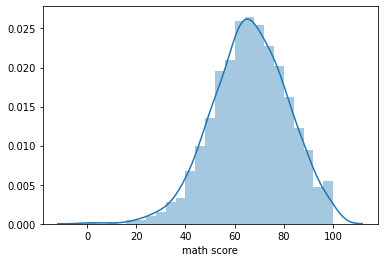

In [22]:
sns.distplot(df['math score'])

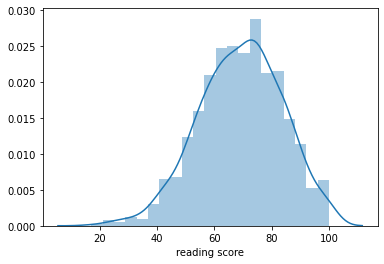

In [24]:
sns.distplot(df['reading score'])

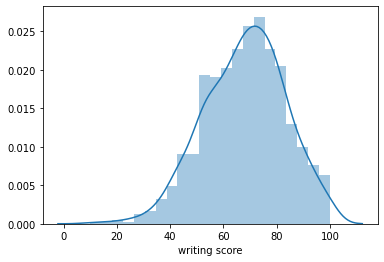

In [25]:
sns.distplot(df['writing score'])

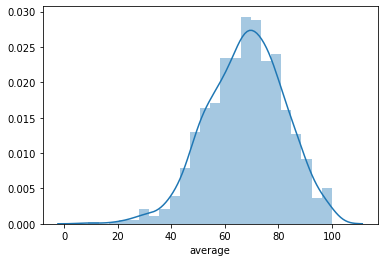

In [26]:
sns.distplot(df['average'])

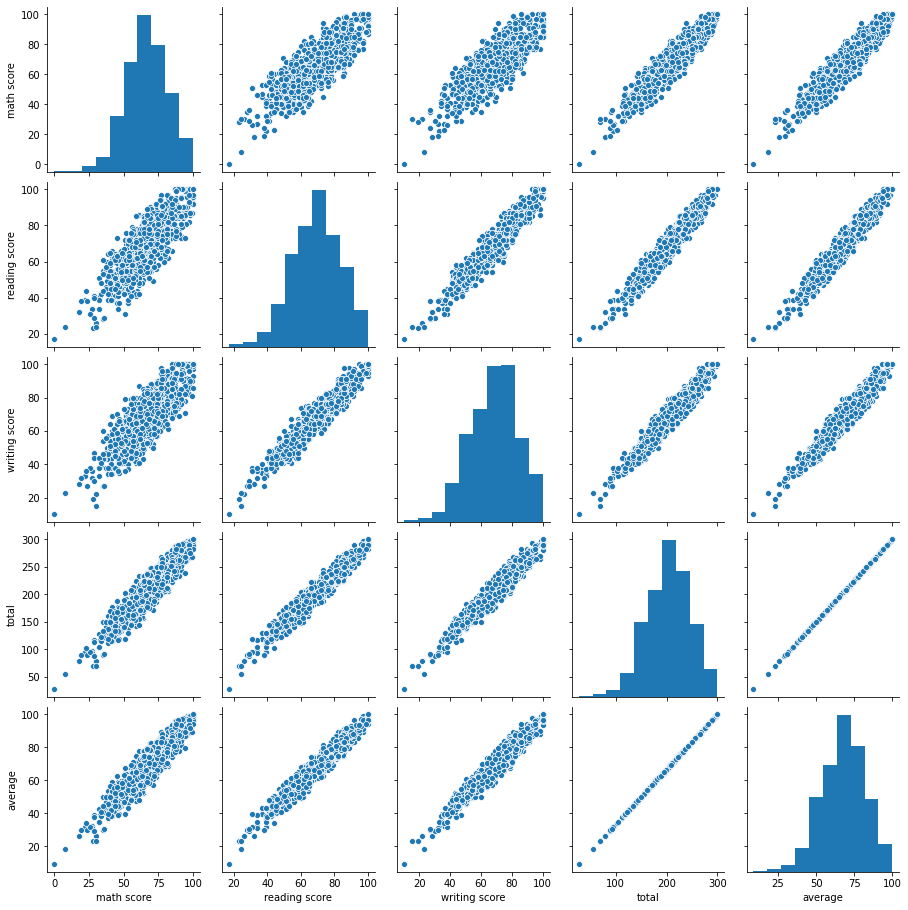

In [27]:
sns.pairplot(df)

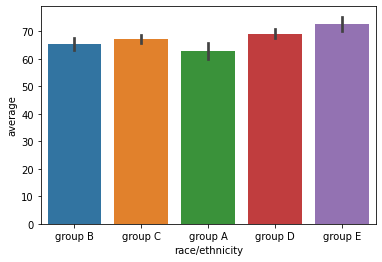

In [28]:
sns.barplot(df['race/ethnicity'], df['average'])

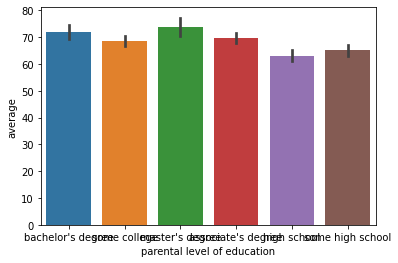

In [29]:
sns.barplot(df['parental level of education'], df['average'])

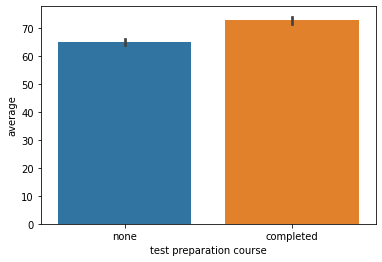

In [30]:
sns.barplot(df['test preparation course'], df['average'])

In [32]:
import numpy as np 

In [74]:
df['math_PassStatus'] = np.where(df['math score']<40, 'F', 'P')
df['read_PassStatus'] = np.where(df['reading score']<40, 'F', 'P')
df['write_PassStatus'] = np.where(df['writing score']<40, 'F', 'P')

In [73]:
df['math_PassStatus'].value_counts()

P    960
F     40
Name: math_PassStatus, dtype: int64

In [36]:
df['read_PassStatus'].value_counts()

P    974
F     26
Name: read_PassStatus, dtype: int64

In [37]:
df['write_PassStatus'].value_counts()

P    968
F     32
Name: write_PassStatus, dtype: int64

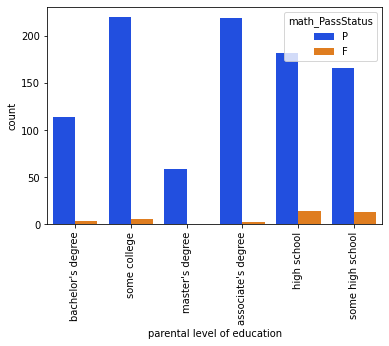

In [41]:
p = sns.countplot(x='parental level of education', data = df, hue='math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)


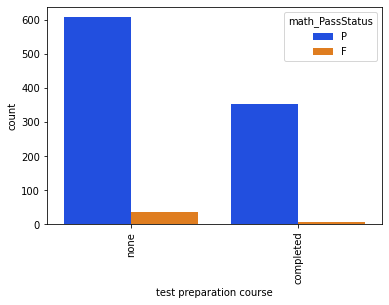

In [42]:
p = sns.countplot(x='test preparation course', data = df, hue='math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

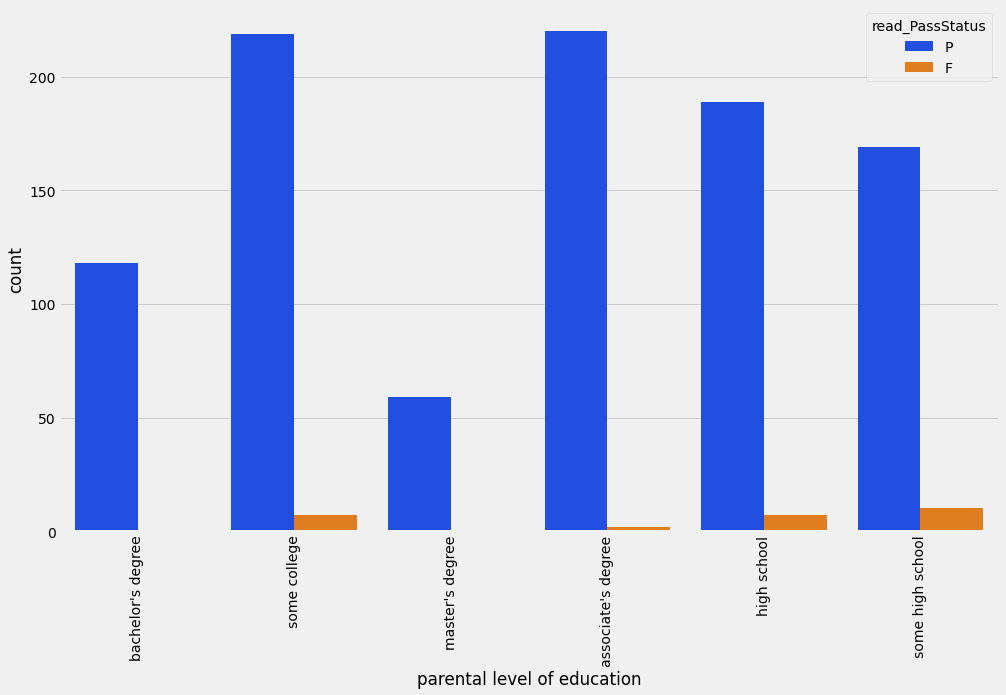

In [76]:
p = sns.countplot(x='parental level of education', data = df, hue='read_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

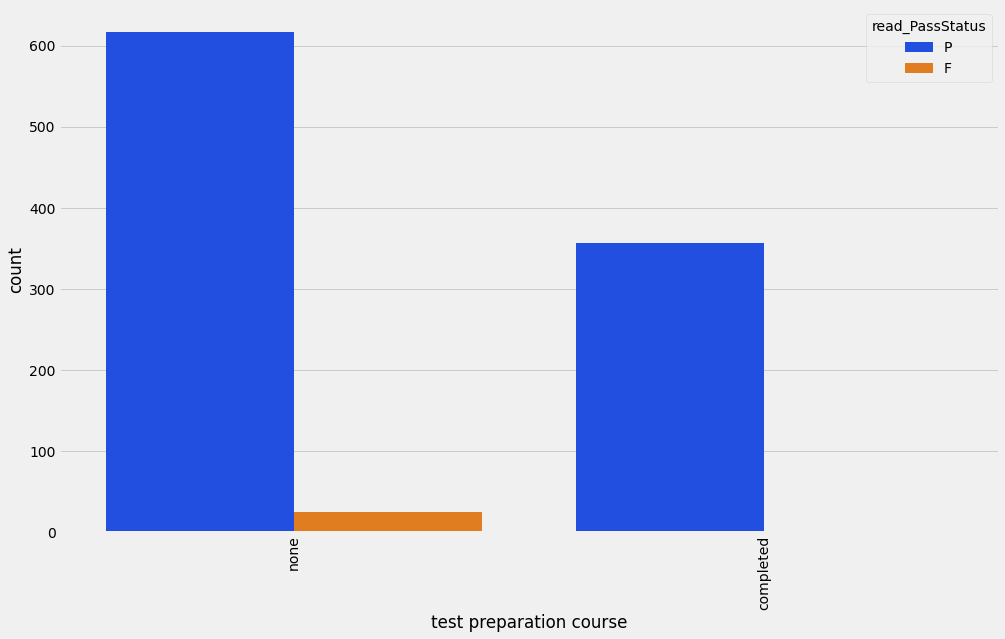

In [77]:
p = sns.countplot(x='test preparation course', data = df, hue='read_PassStatus', palette='bright')
>>> _ = plt.setp(p.get_xticklabels(), rotation=90)

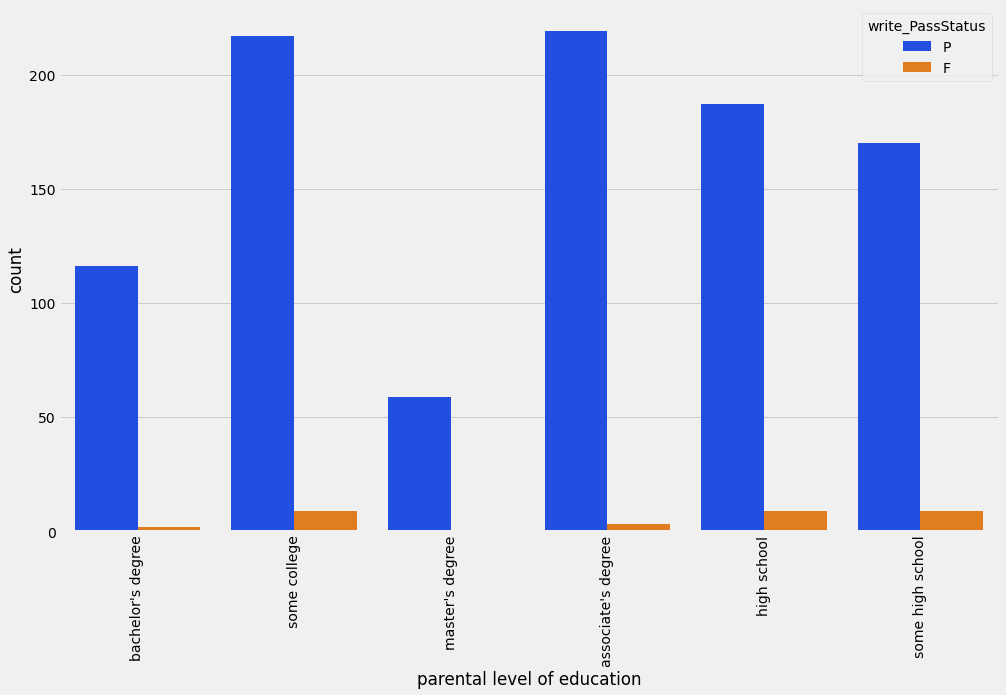

In [78]:
p = sns.countplot(x='parental level of education', data = df, hue='write_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

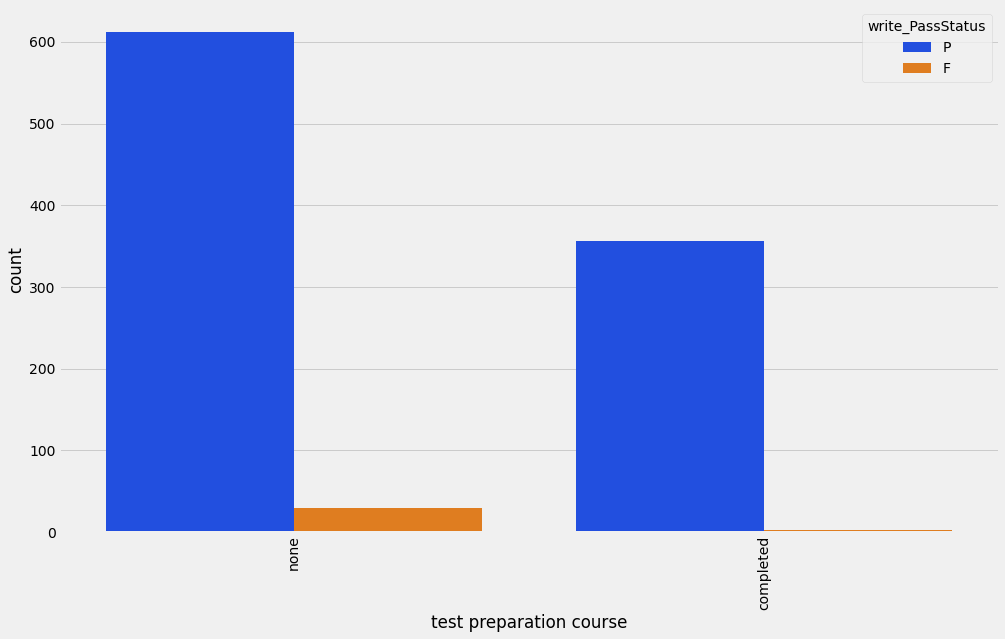

In [79]:
p = sns.countplot(x='test preparation course', data = df, hue='write_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [45]:
!pip install dabl
import dabl

     |████████████████████████████████| 563kB 2.8MB/s 
  Created wheel for dabl: filename=dabl-0.1.8-cp36-none-any.whl size=565076 sha256=8854222fecc201ae17c554ae7763fa15366f7cc3eafd0491e25f22147608b692
  Stored in directory: /root/.cache/pip/wheels/99/8c/79/9d33959b9b8676bf88a2e792075a2a17eda6b1711dc0fedca3
Successfully built dabl


In [80]:
#Girl students scoring 90 in all the subjects

df[(df['gender'] == 'female') &
     (df['math score'] > 90) & 
     (df['writing score'] > 90) &
     (df['reading score'] > 90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average,math_PassStatus,read_PassStatus,write_PassStatus,percentage,pass_math,pass_reading,pass_writing,status,grades
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667,P,P,P,100.0,Pass,Pass,Pass,pass,O
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667,P,P,P,99.0,Pass,Pass,Pass,pass,O
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000,P,P,P,99.0,Pass,Pass,Pass,pass,O
451,female,group E,some college,standard,none,100,92,97,289,96.333333,P,P,P,97.0,Pass,Pass,Pass,pass,O
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000,P,P,P,100.0,Pass,Pass,Pass,pass,O
546,female,group A,some high school,standard,completed,92,100,97,289,96.333333,P,P,P,97.0,Pass,Pass,Pass,pass,O
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100,292,97.333333,P,P,P,98.0,Pass,Pass,Pass,pass,O
594,female,group C,bachelor's degree,standard,completed,92,100,99,291,97.000000,P,P,P,97.0,Pass,Pass,Pass,pass,O
685,female,group E,master's degree,standard,completed,94,99,100,293,97.666667,P,P,P,98.0,Pass,Pass,Pass,pass,O
712,female,group D,some college,standard,none,98,100,99,297,99.000000,P,P,P,99.0,Pass,Pass,Pass,pass,O


In [51]:
#Comparing scores of boys and girls

df.groupby(['gender']).agg(['min','median','max'])

math score             reading score  ... total average                  
              min median  max           min  ...   max     min     median    max
gender                                       ...                                
female          0     65  100            17  ...   300     9.0  70.333333  100.0
male           27     69  100            23  ...   300    23.0  66.333333  100.0

[2 rows x 15 columns]

In [52]:
# Effect of Lunch on Student's Performnce

df[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [53]:
#Effect of Test Preparation Course on Scores

df[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female          67             79             78
                        male            73             70             71
none                    female          62             70             71
                        male            67             60             63

In [54]:
#Effect of Race and Ethnicity on Student's Performance

df[['race/ethnicity',
      'math score',
      'writing score',
      'reading score']].groupby(['race/ethnicity']).agg('median')

,math score,writing score,reading score
race/ethnicity,,,
group A,61.0,62.0,64.0
group B,63.0,67.0,67.0
group C,65.0,68.0,71.0
group D,69.0,72.0,71.0
group E,74.5,72.0,74.0


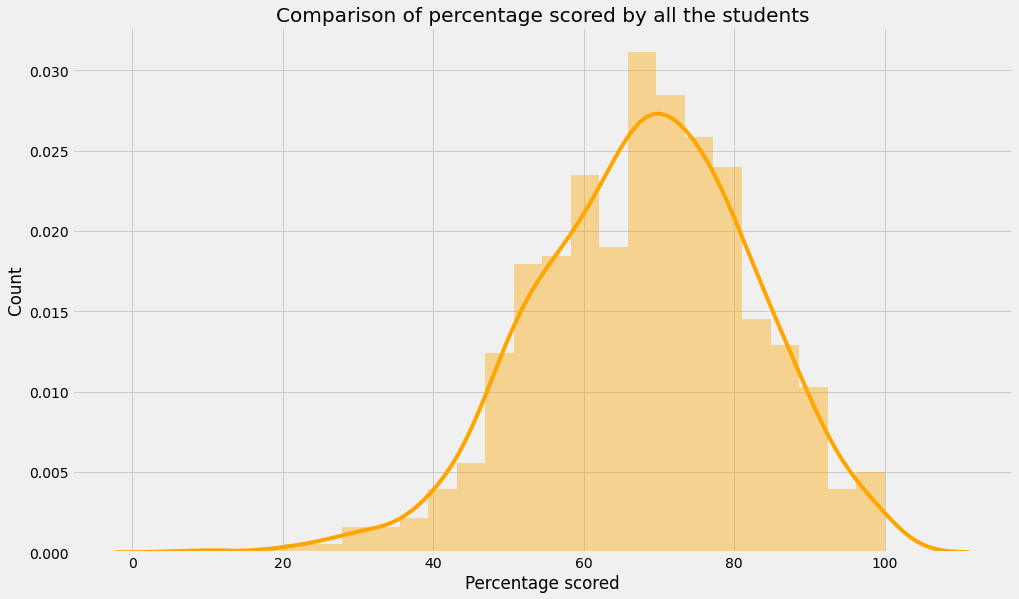

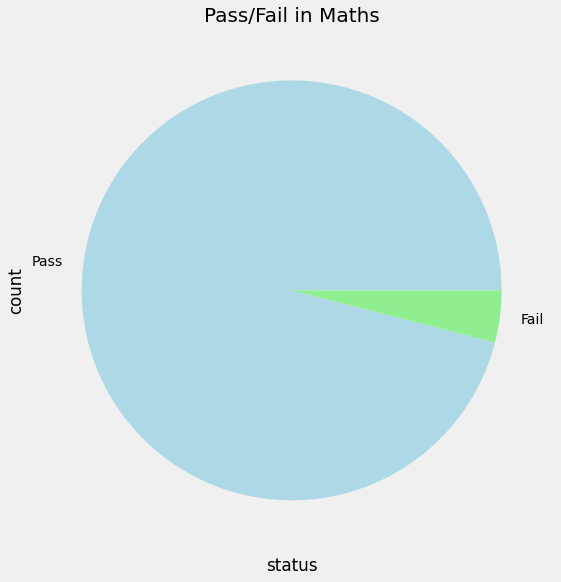

In [65]:
# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
df['pass_math'] = np.where(df['math score']< passmarks, 'Fail', 'Pass')
df['pass_math'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'])

plt.title('Pass/Fail in Maths', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

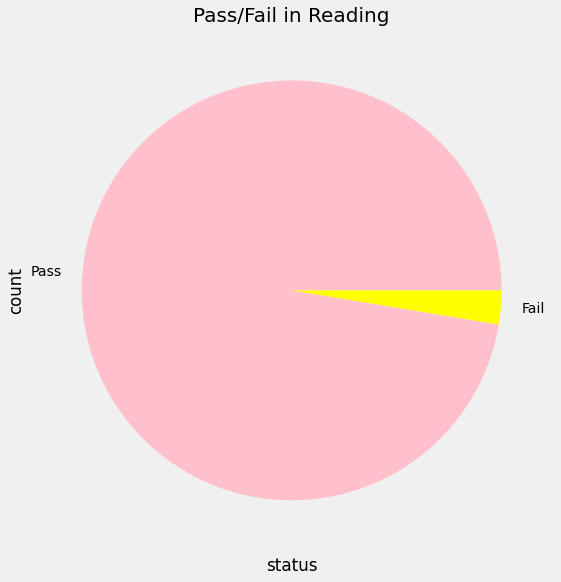

In [66]:
# creating a new column pass_reading, this column will tell us whether the students are pass or fail

df['pass_reading'] = np.where(df['reading score']< passmarks, 'Fail', 'Pass')
df['pass_reading'].value_counts(dropna = False).plot.pie(colors = ['pink', 'yellow'])

plt.title('Pass/Fail in Reading', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

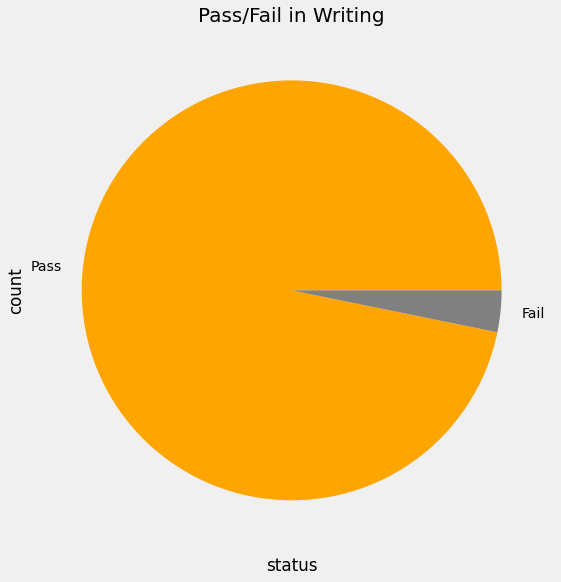

In [67]:
# creating a new column pass_writing, this column will tell us whether the students are pass or fail

df['pass_writing'] = np.where(df['writing score']< passmarks, 'Fail', 'Pass')
df['pass_writing'].value_counts(dropna = False).plot.pie(colors = ['orange', 'gray'])

plt.title('Pass/Fail in Writing', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

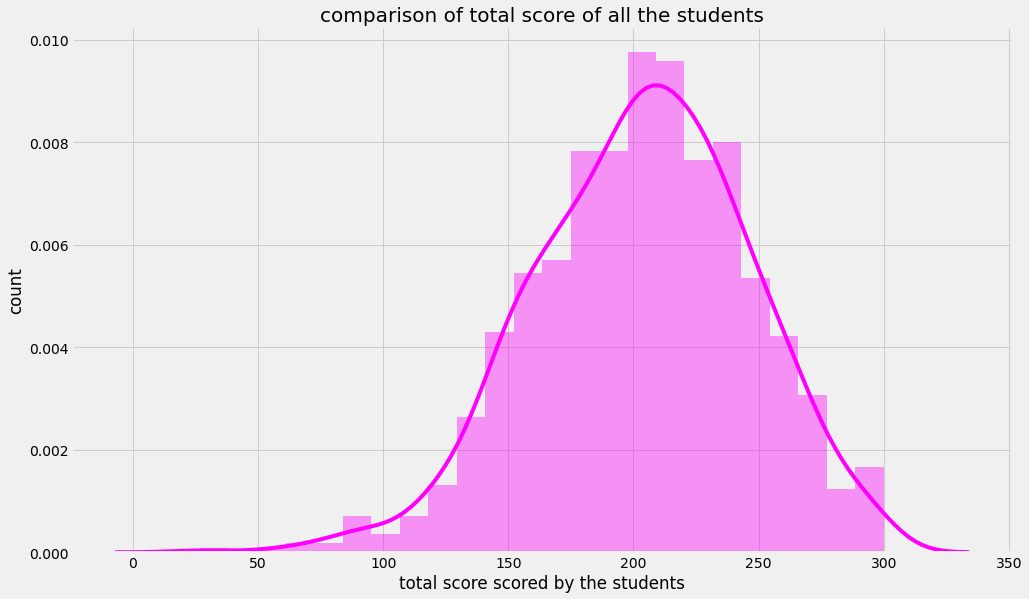

In [68]:
#Plotting total score

import warnings
warnings.filterwarnings('ignore')



sns.distplot(df['total'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

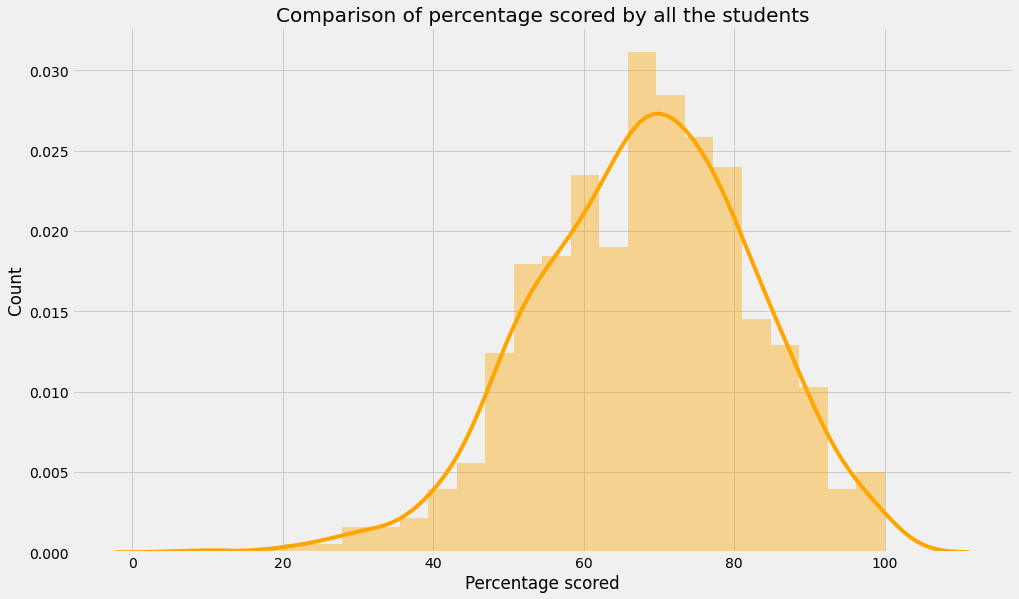

In [69]:
# computing percentage for each of the students

from math import * 
import warnings
warnings.filterwarnings('ignore')

df['percentage'] = df['total']/3

for i in range(0, 1000):
    df['percentage'][i] = ceil(df['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(df['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

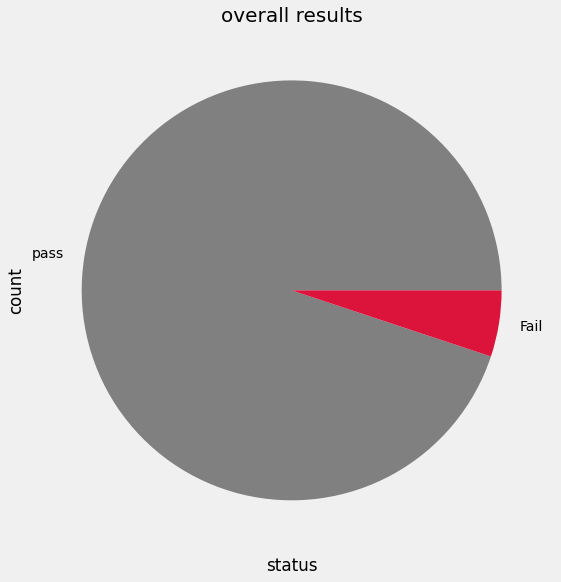

In [70]:
# checking which student is fail overall

df['status'] = df.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

df['status'].value_counts(dropna = False).plot.pie(colors = ['grey', 'crimson'])
plt.title('overall results', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [71]:
# Assigning grades to the grades according to the following criteria :
# 0  - 40  : grade E
# 41 - 60  : grade D
# 60 - 70  : grade C
# 70 - 80  : grade B
# 80 - 90  : grade A
# 90 - 100 : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

df['grades'] = df.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

df['grades'].value_counts()

B    260
C    252
D    223
A    156
O     58
E     51
Name: grades, dtype: int64

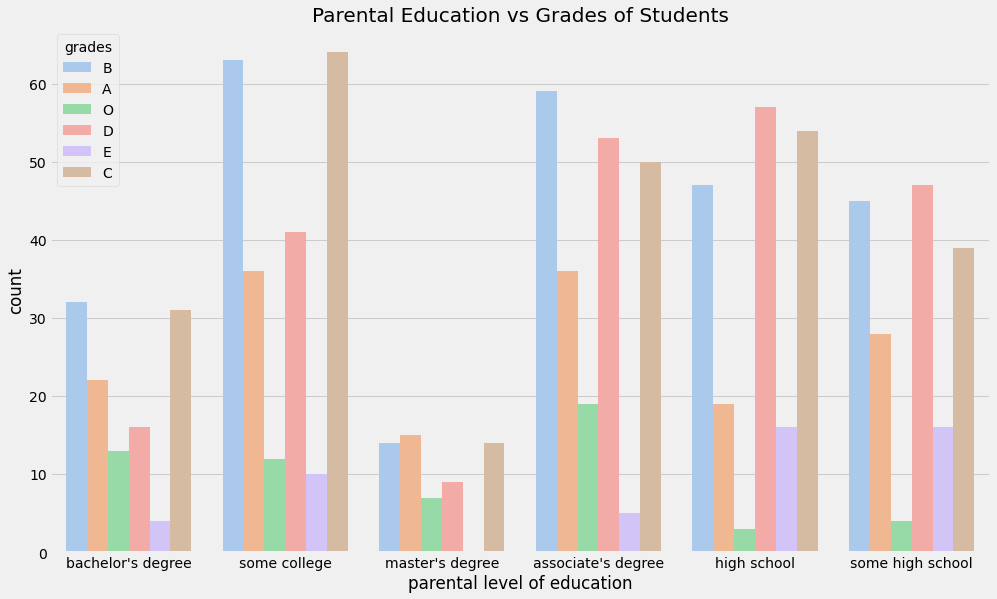

In [81]:
# comparison parent's degree and their corresponding grades

sns.countplot(x = df['parental level of education'], data = df, hue = df['grades'], palette = 'pastel')
plt.title('Parental Education vs Grades of Students', fontsize = 20, fontweight = 30)
plt.show()

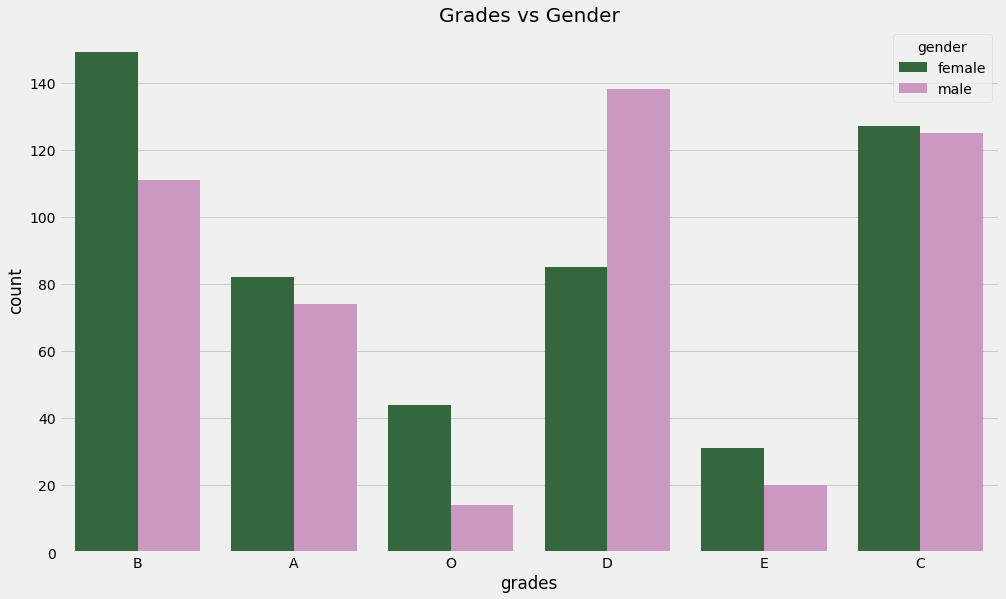

In [82]:
# comparing the distribution of grades among males and females

sns.countplot(x = df['grades'], data = df, hue = df['gender'], palette = 'cubehelix')
#sns.palplot(sns.dark_palette('purple'))
plt.title('Grades vs Gender', fontweight = 30, fontsize = 20)
plt.show()